In [ ]:
!pip install pandas openai sentence-transformers networkx matplotlip pymupdf

In [2]:
import json
import fitz
import logging
import matplotlib.pyplot as plt
import networkx as nx
from networkx import connected_components
from openai import OpenAI
import pandas as pd
from sentence_transformers import SentenceTransformer, util

In [3]:
# TIPOS DE ENTIDADES:
entity_types = {
  "person": { "type": "string" }, 
  "company": { "type": "string" },
  "period of time": { "type": "string" }, 
  "position": { "type": "string" }, 
  "achievement": { "type": "string" },
  "place": { "type": "string" }, 
  "language": { "type": "string" }, 
  "school or university": { "type": "string" }
}

# TIPOS DE RELAÇÕES ENTRE ENTIDADES:
relation_types = {
  "worked for": { "type": "string" },
  "worked as": { "type": "string" }, 
  "studied at": { "type": "string" }, 
  "for time frame": { "type": "string" }, 
  "has achieved": { "type": "string" },
  "is located at": { "type": "string" }, 
  "speaks or understands": { "type": "string" }, 
  "has studied": { "type": "string" }
 }

In [4]:
client = OpenAI(api_key="YOUR API KEY HERE")

In [5]:
def extract_information(text, model="gpt-3.5-turbo"):
   completion = client.chat.completions.create(
        model=model,
        temperature=0,
        messages=[
        {
            "role": "system",
            "content": system_prompt
        },
        {
            "role": "user",
            "content": user_prompt.format(
              entity_types=entity_types,
              relation_types=relation_types,
              specification=text
            )
        }
        ]
    )
   return completion.choices[0].message.content

In [6]:
system_prompt = """You are an expert agent specialized in analyzing curiculum vitae.
Your task is to identify the entities and relations requested with the user prompt, from a given aplicant.
You must generate the output in a JSON containing a list with JOSN objects having the following keys: "head", "head_type", "relation", "tail", and "tail_type".
The "head" key must contain the text of the extracted entity with one of the types from the provided list in the user prompt, the "head_type"
key must contain the type of the extracted head entity which must be one of the types from the provided user list,
the "relation" key must contain the type of relation between the "head" and the "tail", the "tail" key must represent the text of an
extracted entity which is the tail of the relation, and the "tail_type" key must contain the type of the tail entity. Attempt to extract as
many entities and relations as you can.
"""

In [7]:
user_prompt = """Based on the following example, extract entities and relations from the provided text.
Use the following entity types:

# ENTITY TYPES:
{entity_types}

Use the following relation types:
{relation_types}

--> Beginning of example

# Specification
"FERNANDES DEGGERONE \nGRAZIANO \nControl and Automation Engineer \nWorkforce & Business Excellence \n \nProject Engineer at Siemens with 5+ years of experience in a global corporate. Skilled Business Excellence and resource availability \nmanagement agent with effective communication and management skills, with ability on distinct roles: Sales Operations, \nimplementation and maintenance of the Quality Management System and Management support on ADMS bids. \n \nWORK EXPERIENCE \nSiemens Brazil \nProject Engineer II \n \n \nAnalysis and planning of resource availability on complex projects considering risks \nlinked to allocation.  \nApplication of authoring method that aims ranking and prioritizing the implementation \nof projects. \nContinuous process improvement. \nProvision of valuable information to Business Excellence and Sales Operations in a \nnational and global matter. \nImplementation and maintenance of the Quality Management System and for the \nelaboration, verification, and coordination of process-oriented systems, including the \nidentification and implementation of improvements, to ensure the continuous \nenhancement of the quality management, in line with the established strategies. \nBid Technical Support\n \nManagement support on ADMS bids (one of which we were awarded), discussing \nrequirements internally with the team and with the customer, supporting estimating \ncosts and timeline, elaborating documentation, and contacting suppliers. Assisted \nProject Managers to ensure schedule and costs were met. Continuously finding and \nimproving processes. \nResponsible for training and administering, countrywide, the E2E browser-based \nsystem for managing bid requirements that allows integration between analysts, \nengineers, quality team members, sales, project managers and DevOps. \n \nOTHER \n \nIdeasRanker \nAuthoring method that aims ranking and easing choosing projects. \n \nScience Without Borders (Ciência Sem Fronteiras - CsF) \nOne year of Automation and Robotics Engineering in University of Pisa (Italy). \n \nActive member of Innovation Committee at Siemens \nSince 2018. \nSKILLS \n \nTechnical \nAgile \nJira \nMs Project \nOrbit* / Tableau \nPower BI  \nPolarion*: End-to-End – Requirements \nManagement \n* Siemens internal \nProfessional \nEffective Communication \nHighly organized \nInitiative-taking and dependable \nLeadership \nResult-driven \n \n \nEDUCATION \n \nMaster of Business Administration – \nMBA, Agile Project Management in \nEngineering and Industry 4.0 \nPontifical Catholic University of Paraná \n \nControl and Automation Engineer \nFederal Technological University of \nParaná \n \n \nLANGUAGES \n \nPortuguese (Native) \nEnglish (Advanced) \nItalian (Advanced) \nFrench (Beginner) \n \n \nJanuary 2018 – August 2022 \nFebruary 2020 - Current \n \n+55 41 999801805 \n \nleticiadegg@gmail.com \n \nlinkedin.com/in/leticiagraziano/ \n Brazil, Curitiba \n \n"

################

# Output
[
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "worked as",
    "tail": "Control and Automation Engineer",
    "tail_type": "position"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "worked as",
    "tail": "Workforce & Business Excellence",
    "tail_type": "position"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "worked for",
    "tail": "Siemens",
    "tail_type": "company"
  }},
  {{
    "head": "Siemens",
    "head_type": "company",
    "relation": "is located at",
    "tail": "Brazil",
    "tail_type": "place"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "worked as",
    "tail": "Project Engineer II",
    "tail_type": "position"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "has achieved",
    "tail": "Analysis and planning of resource availability on complex projects considering risks linked to allocation.",
    "tail_type": "achievement"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "has achieved",
    "tail": "Application of authoring method that aims ranking and prioritizing the implementation of projects",
    "tail_type": "achievement"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "has achieved",
    "tail": "Continuous process improvement",
    "tail_type": "achievement"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "has achieved",
    "tail": "Provision of valuable information to Business Excellence and Sales Operations in a national and global matter.",
    "tail_type": "achievement"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "has achieved",
    "tail": "Implementation and maintenance of the Quality Management System and for the elaboration, verification, and coordination of process-oriented systems, including the identification and implementation of improvements, to ensure the continuous enhancement of the quality management, in line with the established strategies.",
    "tail_type": "achievement"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "speaks or understands",
    "tail": "Portuguese",
    "tail_type": "language"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "speaks or understands",
    "tail": "English",
    "tail_type": "language"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "speaks or understands",
    "tail": "Italian",
    "tail_type": "language"
  }},
  {{
    "head": "FERNANDES DEGGERONE",
    "head_type": "person",
    "relation": "speaks or understands",
    "tail": "French",
    "tail_type": "language"
  }}
]

--> End of example

For the following specification, generate extract entitites and relations as in the provided example.

# Specification
{specification}
################

# Output

"""

In [8]:
with fitz.open("CV Nicholas Arand EN - 2022.pdf") as doc:  # open document
    text = chr(12).join([page.get_text() for page in doc])
print(text)

Nicholas Arand 
 
PROFILE: 
 
Qualified Industrial Engineer with more than 15 years of experience in management within a wide range of activities in the 
manufacturing and service industry. Has managed crisis situations in different countries and cultural scenarios. Has lead 
major projects such as the implementation and continual improvement of management systems and profitability 
improvement through consistent team building and application of lean manufacturing culture. Adaptable, analytical, broad-
minded, calm, cooperative, reliable and resourceful are main personal qualities developed during the career. 
 
WORK EXPERIENCE: 
 
Over 20 Years in Thales DIS (Previously Gemalto), in the smart cards business: financial, GSM and transport cards 
manufacturing and personalization. 
 
Quality Manager – Curitiba/BRAZIL – January 2020 – Current position 
 
Manage team of Engineers to ensure customer satisfaction and minimize cost of quality and non-quality in the 
manufacturing of micropro

In [ ]:
extracted_relations = extract_information(text)

In [ ]:
# transform text to json
import json
def text_to_json(text):
    json_data = json.loads(text)
    return json_data

extracted_relations = text_to_json(extracted_relations[7:-3])


In [12]:
extracted_relations

[{'head': 'Nicholas Arand',
  'head_type': 'person',
  'relation': 'worked as',
  'tail': 'Quality Manager',
  'tail_type': 'position'},
 {'head': 'Nicholas Arand',
  'head_type': 'person',
  'relation': 'worked as',
  'tail': 'Process Improvement Coordinator for Latin America',
  'tail_type': 'position'},
 {'head': 'Nicholas Arand',
  'head_type': 'person',
  'relation': 'worked as',
  'tail': 'Production Manager',
  'tail_type': 'position'},
 {'head': 'Nicholas Arand',
  'head_type': 'person',
  'relation': 'worked as',
  'tail': 'Quality, Projects and Engineering Manager & WCE Coordinator',
  'tail_type': 'position'},
 {'head': 'Nicholas Arand',
  'head_type': 'person',
  'relation': 'worked for',
  'tail': 'Thales DIS (Previously Gemalto)',
  'tail_type': 'company'},
 {'head': 'Thales DIS (Previously Gemalto)',
  'head_type': 'company',
  'relation': 'is located at',
  'tail': 'Curitiba',
  'tail_type': 'place'},
 {'head': 'Nicholas Arand',
  'head_type': 'person',
  'relation': 'h

In [14]:
kg_relations = pd.DataFrame(extracted_relations)

In [15]:
G = nx.Graph()
for _, row in kg_relations.iterrows():
  G.add_edge(row['head'], row['tail'], label=row['relation'])

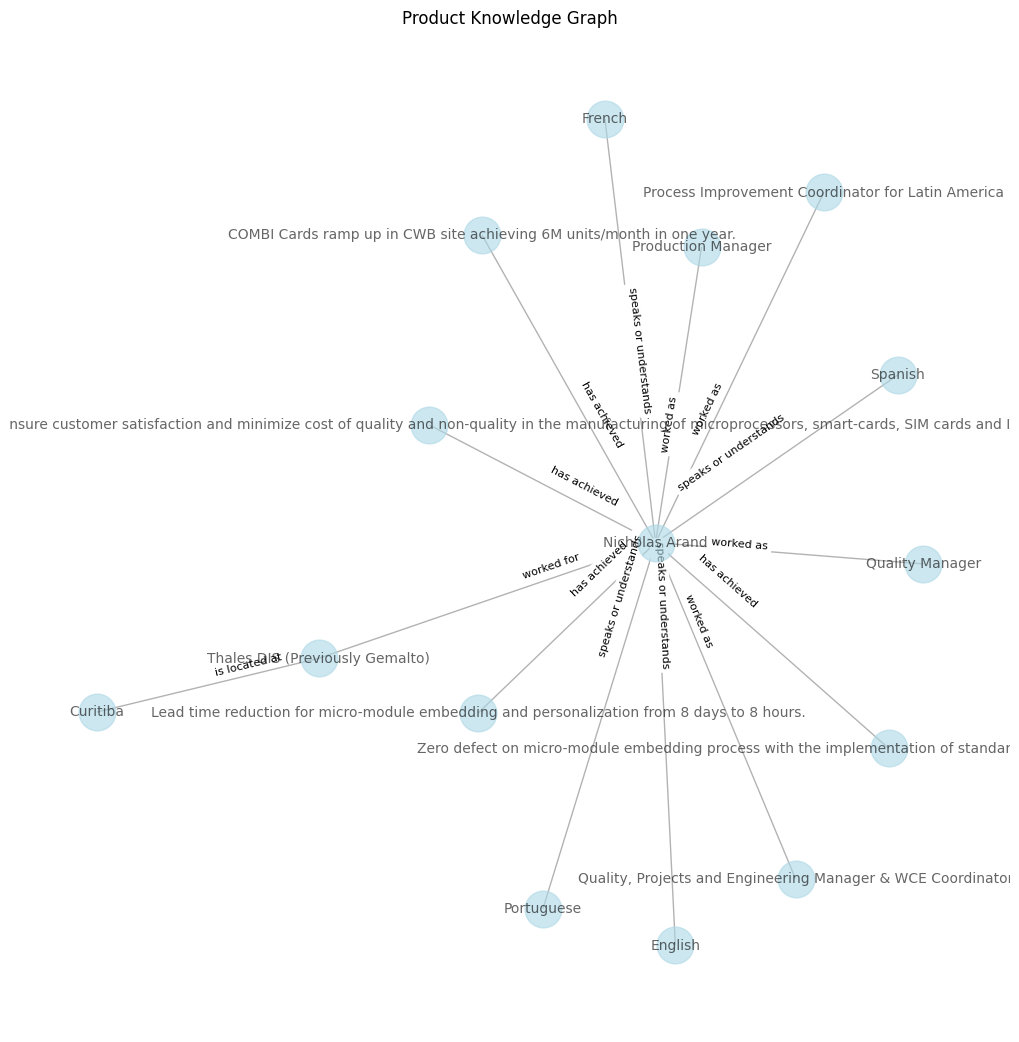

In [16]:
pos = nx.spring_layout(G, seed=47, k=0.9)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Product Knowledge Graph')
plt.show()

In [66]:
client.close()